##                                Importing the Dependies

<img src= "CardiacPictureTeam1Pycharmers.jpg" width=500, height=500>

## Data Collection and Processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
df_Responsivenes=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Responsivenes')



df_Hospitalization_Discharge = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name = "Hospitalization_Discharge")
df_CardiacComplications = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name = "CardiacComplications")
df_Responsivenes = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name = "Responsivenes")
df_PatientHistory = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name = "PatientHistory")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name ="Labs")
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Demography")
df_Patient_Prescriptions = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Patient_Precriptions")


## Question1 How many patients were registered in each unique occupation?

In [7]:
df_Demography.groupby('occupation').size()

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
dtype: int64

## Question2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

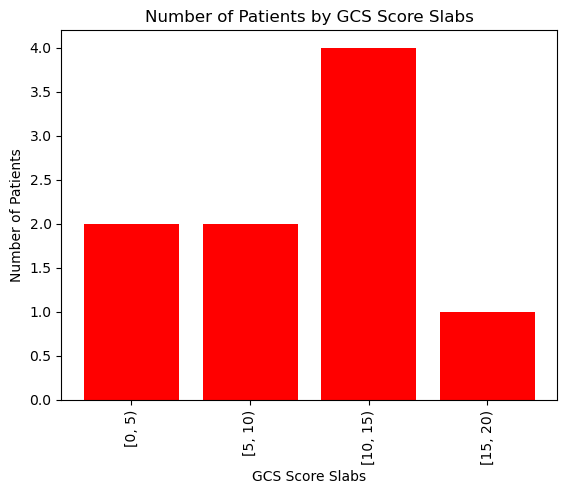

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


slabs = range(0, 21, 5)


# Create bins for the GCS scores
bins = pd.cut(df_Responsivenes['GCS'], bins=slabs, right=False, include_lowest=True)

# Count the number of patients falling within each slab
counts = bins.value_counts(sort=False)

# Plot the counts as a bar graph
plt.bar(counts.index.astype(str),counts.values,color='red')
plt.title('Number of Patients by GCS Score Slabs')
plt.xlabel('GCS Score Slabs')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
##plt.tight_layout()
plt.show()

## Question3  Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [30]:
# Question no.3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you?
# Convert "Admission date" to datetime
df_Hospitalization_Discharge['Admission date'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date'])
# Add calculated column "Discharge date" by adding "Discharge day" to "Admission date"
df_Hospitalization_Discharge['Discharge date'] = df_Hospitalization_Discharge['Admission_date'] + pd.to_timedelta(df_Hospitalization_Discharge['dischargeDay'], unit='D')

# Display the DataFrame
df_Hospitalization_Discharge['Discharge date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge date, Length: 2008, dtype: datetime64[ns]

## Question4 What percentage of patients had Biventricular heart failure?

In [31]:
#Question no 4. Count the number of patients with biventricular heart failure
num_biventricular_failure = df_CardiacComplications['type_of_heart_failure'].str.contains('both', case=False).sum()

# Count the total number of patients
total_inpatient_number = len(df_CardiacComplications)

# Calculate the percentage
percentage_biventricular_failure = (num_biventricular_failure / total_inpatient_number) * 100

# Print the result
print(f"The percentage of patients with biventricular heart failure is: {percentage_biventricular_failure:.2f}%")

The percentage of patients with biventricular heart failure is: 73.71%


## Question5 What is the ratio of patients who were responsive to pain vs responsive to sound?

In [36]:
# question 5 What is the ratio of patients who were responsive to pain vs responsive to sound?
ResponsiveToPain_count = (df_Responsivenes['consciousness'] == 'ResponsiveToPain').sum()
# Count the number of patients responsive to sound
ResponsiveToSound_count =  (df_Responsivenes['consciousness'] == 'ResponsiveToSound').sum()
# Calculate the ratio
ratio_pain_to_sound = ResponsiveToPain_count / ResponsiveToSound_count
ratio = f"{ResponsiveToPain_count}:{ResponsiveToSound_count}"

# Print the ratio
print("Ratio of patients responsive to pain vs responsive to sound:", ratio , ratio_pain_to_sound)

Ratio of patients responsive to pain vs responsive to sound: 4:19 0.21052631578947367


## Question6 What was the average age group of the patients that had an outcome of 'Alive'?

In [41]:

df_Hospitalization_Discharge=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
filtered_df = df_Hospitalization_Discharge[df_Hospitalization_Discharge["outcome_during_hospitalization"].str.contains("Alive")]

#df_Demography=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
f = filtered_df[["inpatient_number","outcome_during_hospitalization"]].merge(df_Demography[["inpatient_number","ageCat"]],on = "inpatient_number",how = "inner") 


s = f.groupby(['outcome_during_hospitalization','ageCat']).size()
result = s.loc[s.groupby(level=0).idxmax()].reset_index().drop(0,axis=1)
print("The average age group of the patients that had more outcome of Alive are:")
print(result)

The average age group of the patients that had more outcome of Alive are:
  outcome_during_hospitalization ageCat
0                          Alive  69-79


## Question7 Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

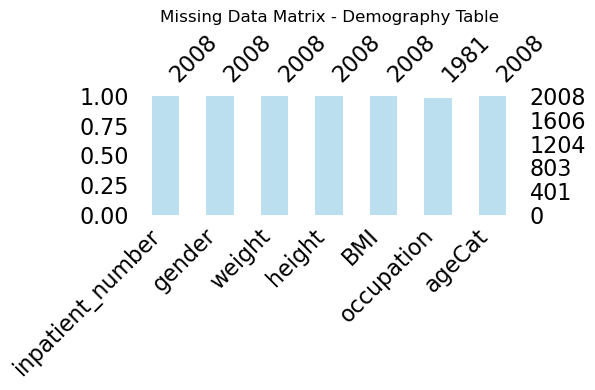

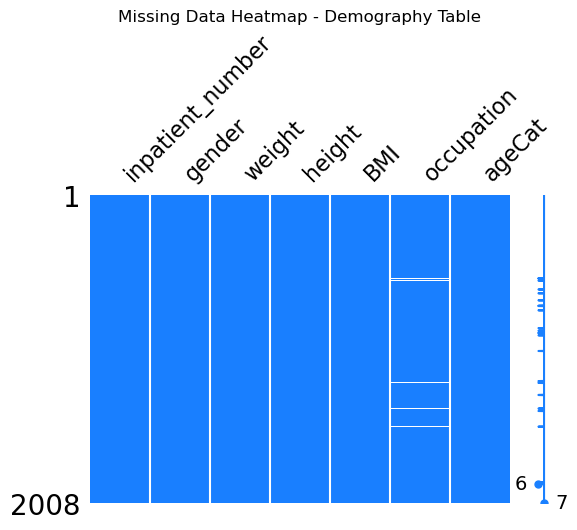

In [42]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.light_palette("skyblue", as_cmap=True)

# Visualize missing data patterns with a bar chart
msno.bar(df_Demography, figsize=(6, 4), color=cmap(0.5))  # Set color using the colormap
plt.title('Missing Data Matrix - Demography Table')  # Corrected title
plt.tight_layout()
plt.show()

# Visualize missing data patterns with a heatmap
msno.matrix(df_Demography, figsize=(6, 4), color=(0.1, 0.5, 1))  # Use RGB tuple for color
plt.title('Missing Data Heatmap - Demography Table')
plt.show()

## Question8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

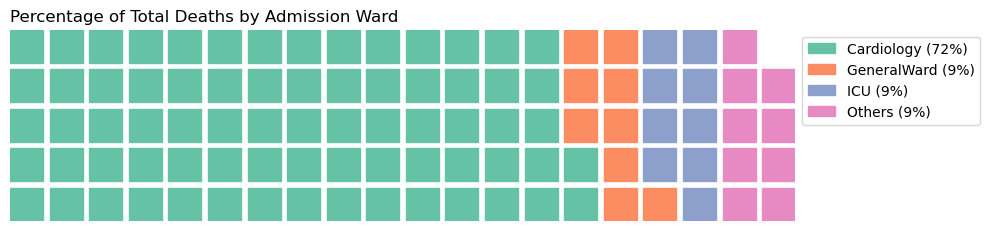

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

dead_df = df_Hospitalization_Discharge[df_Hospitalization_Discharge['outcome_during_hospitalization'].str.contains("Dead")]
death_percentage = dead_df['admission_ward'].value_counts(normalize=True) * 100

values = {
    'Cardiology': int(death_percentage.get('Cardiology', 0)),
    'GeneralWard': int(death_percentage.get('GeneralWard', 0)),
    'ICU': int(death_percentage.get('ICU', 0)),
    'Others': int(death_percentage.get('Others', 0))
}
formatted_values = {key: f"{value}%" for key, value in values.items()}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=values,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'labels': [f"{key} ({value})" for key, value in formatted_values.items()]},
    figsize=(10, 5)
)

plt.title('Percentage of Total Deaths by Admission Ward', loc='left')
plt.show()


## Question9 Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [44]:
array1 = np.array([[11, 12,1], [13, 14,2] ,[6,7,8]])
array2 = np.array([[5, 6,2], [7, 8,3],[1,2,3]])

result_array = np.dot(array1, array2)

print(result_array)

[[140 164  61]
 [165 194  74]
 [ 87 108  57]]


## Question10  Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

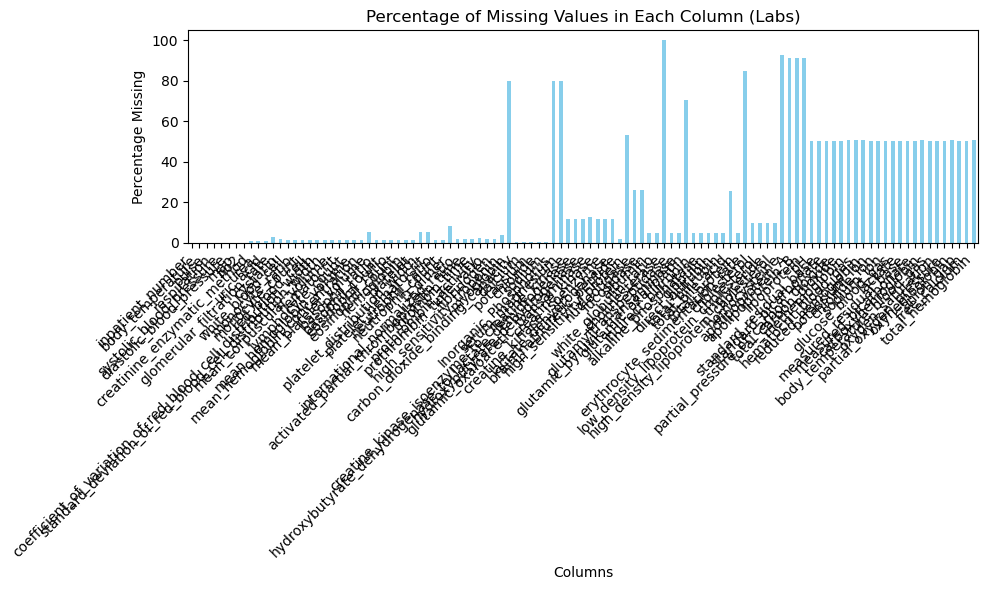

In [45]:
missing_percentages = (df_Labs.isnull().sum() / len(df_Labs)) * 100
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column (Labs)')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Question11  A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid
## mobile number and "NO" if it is not on separate lines. Do not print the quotes. {2,9587456281,1252478965,7397260044}

In [46]:
numbers = ['2','9587456281','1252478965','7397260044']

for number in numbers:
    if len(number) == 10 and number[0] in ['7', '8', '9'] and number.isdigit():
        print("YES")
    else:
        print("NO")

NO
YES
NO
YES


## Question12 If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what 
##is the MAP of most patients with this condition?

In [48]:
import pandas as pd
df = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="CardiacComplications")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Labs")
abnormal_diameter = df[(df['left_ventricular_end_diastolic_diameter_LV'] > 5.6) | (df['left_ventricular_end_diastolic_diameter_LV'] < 3.5)]
num_patients_outside_limit = len(abnormal_diameter)
merged_df = abnormal_diameter.merge(df_Labs, on='inpatient_number', how='inner')
most_patients_with_condition = merged_df['map'].mode()[0]
print("Number of patients with left ventricular end-diastolic diameter outside normal range:", num_patients_outside_limit)
print("MAP of most patients with this condition:", round(most_patients_with_condition, 2))

Number of patients with left ventricular end-diastolic diameter outside normal range: 1311
MAP of most patients with this condition: 96.67


## Question13 Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

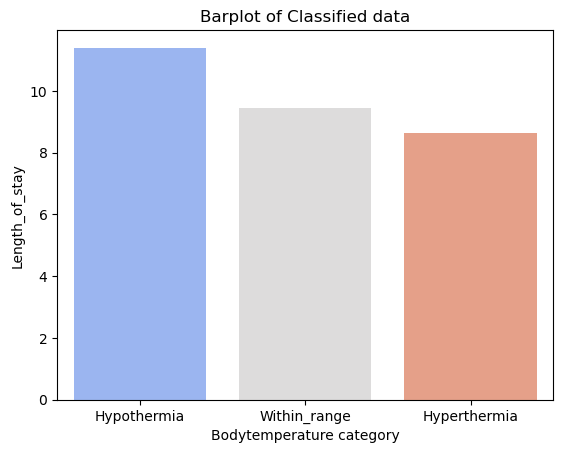

In [49]:
#df1 =  pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Hospitalization_Discharge")
filtered_df_Hospitalization_Discharge = df_Hospitalization_Discharge[['inpatient_number', 'dischargeDay']]

#df2 =  pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name="Labs")
filtered_df_Labs = df_Labs[['inpatient_number', 'body_temperature']]

merged_df = pd.merge(filtered_df_Hospitalization_Discharge, filtered_df_Labs, on='inpatient_number')
bins=[25, 36.0, 37.5, 45]
labels = ['Hypothermia','Within_range','Hyperthermia']
merged_df['bodytemperature'] = pd.Categorical(pd.cut(merged_df['body_temperature'], 
                                                          bins=bins,
                                                          labels=labels, right=False))

category_means = merged_df.groupby('bodytemperature',observed=True)['dischargeDay'].mean().reset_index()

sns.barplot(data=category_means, x='bodytemperature', y='dischargeDay', palette='coolwarm')
plt.title('Barplot of Classified data')
plt.xlabel('Bodytemperature category')
plt.ylabel('Length_of_stay')
plt.show()

## Question14 Find the list of patients whose DischargeDay is greater than the value given by the user

In [ ]:
i = int(input())
ls = []
for x in range(df_Hospitalization_Discharge.shape[0]):
    if(df_Hospitalization_Discharge['dischargeDay'][x]>i):
        ls.append(df_Hospitalization_Discharge['inpatient_number'][x])
ls

## Question15 Display a pie chart of number of patients in each category listed
## -death_within_28_days,-re_admission_within_28_days,-death_within_3_months ,
## -re_admission_within_3_months,-death_within_6_months,-re_admission_within_6_months,
## -return_to_emergency_department_within_6_months

In [ ]:
dfpie = df_Hospitalization_Discharge[['death_within_28_days', 're_admission_within_28_days',
                   'death_within_3_months', 're_admission_within_3_months',
                   'death_within_6_months', 're_admission_within_6_months',
                   'return_to_emergency_department_within_6_months']]
total = dfpie.sum()
colors = plt.cm.tab20.colors[:len(total)]
labels_counts = [f"{label} ({count})" for label, count in zip(total.index, total)]
plt.figure(figsize=(6, 6))
plt.pie(total, labels=labels_counts, startangle=140, colors=colors)
plt.title('Number of Patients in Each Category')
plt.axis('equal')
plt.show()


## Question16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid
## and BMI as columns, using melt functions

In [ ]:
data1=df_CardiacComplications[['inpatient_number','myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease']]
data2=df_Labs[['inpatient_number','uric_acid']]
data3=df_Demography[['inpatient_number','BMI']]

Mtable = pd.merge(pd.merge(data1,data2, on='inpatient_number'), data3, on='inpatient_number')
melted_df = pd.melt(Mtable, id_vars=['inpatient_number', 'uric_acid', 'BMI'],
                    value_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                    value_name='Status')
filtered_df = melted_df[melted_df['Status'] == 1]
table = filtered_df.pivot_table(index='variable', values=['uric_acid', 'BMI'], aggfunc='mean')
print(table)

## Question17 Using arrays and loops find the number of patients who were Admitted in the month of November

## Question18 Create a heatmap on any columns of your choice including at least 1 lab value

## Question19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by 
## using set_hatch() method

## Question20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
## Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
## x=1, y=1, z=2, n-3

## Question21 Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of
## any student(s) having the second lowest grade.
## python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

## Question22 Which patient was on the most number of prescribed drugs? What was his age and outcome?

## Question23 How many patients were prescribed Digoxin?

## Question24 What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

## Question25 Using GCS score, how many patients are considered to be in a coma?

## Question26  Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

## Question27 Using the age column generated in Q.26, calculate year of birth for each patient

## Question28 Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

## Question29 What percentage of those in a coma also have diabetes?

## Question30 Identify any columns relating to echocardiography and create a severity score for cardiac function. 
## Compare this outcome and show average severity score for each outcome

## Question31 Group the days to re-admission into bins and count how many patients were in each bin

## Question32Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

## Question33 Retrieve the row with minimum white_blood_cell count using sorting technique.

## Question34 get the last letter of discharge_department of patients using RegEX

## Question35 find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is
## hackathon This)

## Question36 Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
## ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
## ** Plot (x,y) on that axes and set the labels.

## Question37 Using dischargeDay values print even if it even number and odd if it odd number

## Question38 find the length of Tuple for any given input (Hint: Input a string from user )

## Question39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

## Question40 Select 25 different random values between 200 to 800.

## Question41 Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

## Question42 np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
## When the value is less than 9, print as 0,else print 1

## Question43 Give Distribution chart of max Killip_grade

## Question44 Based on Q26 and 27 display all demographic details of patients who are born in year 1945

## Question45 Create a dataframe with date and time as columns, where the values are the admission time

## Question46 Convert occupation into numeric by Label encoding

## Question47 Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

## Question48 Using loops, create a multiplication table for the number 7

## Question49 Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)